## 2. Conditional density estimation for the Banana distribution

In this notebook, we will show how to perform conditional density estimation. For a state variable $\mathsf{X} \sim \pi_{\mathsf{X}} \in \mathbb{R}^{N_x}$ and an observation variable $\mathsf{Y} \sim \pi_{\mathsf{X}} \in \mathbb{R}^{N_y}$, we are interested in the characterization of the posterior density $\pi_{\mathsf{X}| \mathsf{Y}}(\boldsymbol{x} | \boldsymbol{y}^\star)$, where $\boldsymbol{y}^\star$ is the realization of the observation $\mathsf{Y}$. In particular, we would like to sample from the posterior density $\pi_{\mathsf{X} | \mathsf{Y}} (\boldsymbol{x} | \boldsymbol{y}^\star)$ given $N_e$ samples $\{ \boldsymbol{x}^1, \ldots, \boldsymbol{x}^{N_e} \}$ from the prior density $\pi_{\mathsf{X}}$.

Let $\boldsymbol{S} \colon \mathbb{R}^{N_y+N_x} \xrightarrow{} \mathbb{R}^{N_y+N_x}$ be the KR rearrangement that pushes forward the joint density $\pi_{\mathsf{X}, \mathsf{Y}}$ (target density) to the standard normal density $\mathcal{N}(\boldsymbol{0}_{N_y+N_x}, \boldsymbol{I}_{N_y+N_x})$ (reference density). From its lower triangular structure, $\boldsymbol{S}$ can be decomposed as follows:

\begin{equation}
\label{eqn:split}
\boldsymbol{S}(\boldsymbol{y}, \boldsymbol{x})=\left[\begin{array}{c}
\begin{aligned}
& \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}) \\
& \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x})
\end{aligned}
\end{array}\right],
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{Y}}} \colon \mathbb{R}^{N_y} \xrightarrow{} \mathbb{R}^{N_y}$ and $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}} \colon \mathbb{R}^{N_y+N_x} \xrightarrow{} \mathbb{R}^{N_x}$. For a sample $(\boldsymbol{y}, \boldsymbol{x})$ from the joint density, $\boldsymbol{a} = \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}, \boldsymbol{x})$ is a sample from $\mathcal{N}(\boldsymbol{0}_{N_x}, \boldsymbol{I}_{N_x})$, as $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\mathsf{Y}, \mathsf{X}) \sim \mathcal{N}(\boldsymbol{0}_{N_x}, \boldsymbol{I}_{N_x})$.

For a realization $\boldsymbol{y}^\star \in \mathbb{R}^{N_y}$ of the observation variable, instead of $\boldsymbol{y}$, we update our prior estimate $\boldsymbol{x}$ into $\boldsymbol{x}_a$ such that  $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{a}$. Therefore, the analysis step looks for $\boldsymbol{x}_a \in \mathbb{R}^{N_x}$ such that:
\begin{equation}
\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}).
\end{equation}

The map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ pushes forward the posterior density $\pi_{\mathsf{X} | \mathsf{Y}}(\cdot | \boldsymbol{y}^\star)$ to the standard normal density $\mathcal{N}(\boldsymbol{0}_{N_x}, \boldsymbol{I}_{N_x})$, so $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ is a bijection of $\mathbb{R}^{N_x}$ and there exists a unique solution to the vector-valued nonlinear equation above, denoted $\boldsymbol{x}_a$. This solution is exactly the posterior update of the prior estimate $\boldsymbol{x}$ given the realization $\boldsymbol{y}^\star$ of the observation variable. We arrive at the definition of the prior-to-posterior transformation $\boldsymbol{T} \colon \mathbb{R}^{N_y} \times \mathbb{R}^{N_x} \xrightarrow{} \mathbb{R}^{N_x}$:
\begin{equation}
\label{eqn:tmapdef}
    \boldsymbol{T}(\boldsymbol{y}, \boldsymbol{x}) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}\circ \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}),
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}$ 
denotes the inverse of the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ that comes from setting the first $N_y$ entries of $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ to $\boldsymbol{y}^\star$.

References: 

[1] Spantini, A., Baptista, R. and Marzouk, Y., 2019. Coupling techniques for nonlinear ensemble filtering. arXiv preprint arXiv:1907.00389.

[2] Marzouk, Y., Moselhy, T., Parno, M. and Spantini, A., 2016. Sampling via measure transport: An introduction. Handbook of uncertainty quantification, pp.1-41.

[3] Le Provost, M., Baptista, R., Marzouk, Y. and Eldredge, J., 2021. A low-rank nonlinear ensemble filter for vortex models of aerodynamic flows. In AIAA Scitech 2021 Forum (p. 1937).

In [1]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions

Load some packages to make nice figures

In [2]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

### Problem setup

We generate $N_e$ samples from $\mathsf{Y} = \mathsf{X}^2 + \mathcal{E}$ for $\mathsf{X} \sim \mathcal{N}(0, 0.5^2)$ and $\mathcal{E} \sim \mathcal{N}(0, 0.1^2)$.

In [8]:
Ne = 1*10^4# Number of samples
Nx = 1 # Dimension of the state
Ny = 1 # Dimension of the observation

πx = Normal(0, 0.5)
πϵ = Normal(0, 0.1)

X = zeros(Ny+Nx, Ne)

for i=1:Ne
    xi = rand(πx)
    ϵi = rand(πϵ)
    X[1,i] = xi^2 + ϵi
    X[2,i] = xi
end

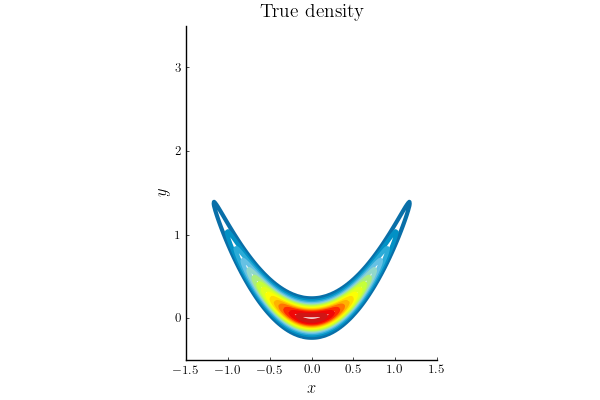

In [9]:
Nlog = 200
logbanana = zeros(Nlog, Nlog)

xrange = range(-1.5; stop = 1.5, length = Nlog)
yrange = range(-0.5; stop = 3.5, length = Nlog)

for (i,xi) in enumerate(xrange)
    for (j,yj) in enumerate(yrange)
        logbanana[i,j] = logpdf(πϵ, yj-xi^2) + logpdf(πx, xi)
    end
end


contour(xrange, yrange, exp.(logbanana)', ratio = 1,
         title = "True density",
         colorbar = false, grid = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         linewidth = 3, xlabel = L"x", ylabel = L"y")

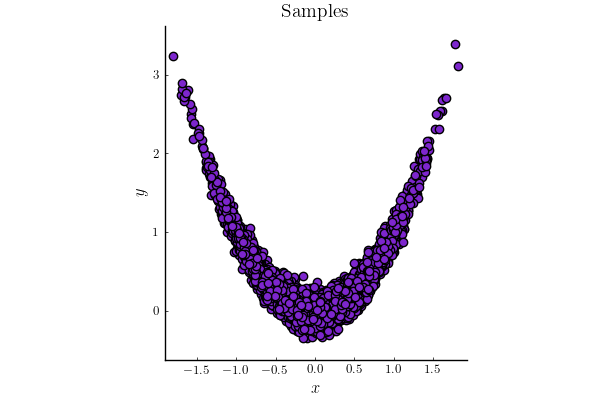

In [10]:
contour(xrange, yrange, exp.(logbanana)', ratio = 1,
         colorbar = false, grid = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         linewidth = 3)
scatter!(X[2,:], X[1,:], ratio = 1, linewidth = 3,
       legend = false, color = :purple3, markersize = 6, xlabel = L"x", ylabel = L"y", title = "Samples")

We define an object of  `HermiteMap` `S` to hold the Knothe-Rosenblatt rearrangement that pushes forward $\pi$ to the reference density, i.e. the standard Gaussian distribution $\rho$.
The default constructor for an `HermiteMap` requires, where $m$ is the maximal order of the Hermite polynomials considered in the expansion, $N_x$ the dimension of the state, $L$ a linear transformation that rescale the samples to get zero mean and unitary standard deviation component-wise, and $C$ an array of $N_x$ `MapComponent`.

In [11]:
m = 100
S = HermiteMap(m, X; diag = true);

The next step is to use the greedy algorithm developed by Baptista et al. (2020) to construct a sparse expansion of the different components of the map $S$. Depending on the accuracy of the amp required. Several options are possible for the optimization: 
* `kfold` uses a k-fold cross validation procedure (the more robust choice)
* `split` splits the set of samples into a training and a testing
* An `Int64` to determine the maximum number of features for each component $s^k$ of the map $S$
* `nothing` to simply optimize the existing coefficients in the basis expansion

We only need to optimize the components of $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ to perform conditional sampling. Thus, we set the optional argument `start` to $N_y+1$ (2 in this problem) 

In [73]:
optimize(S, X, "kfold"; withqr = true, verbose = true, start = 2, conditioner = true)

1 terms - Training error: 1.4247422508624823, Validation error: 1.393223662573434
1 terms - Training error: 1.4241376020277607, Validation error: 1.3993106282476033
2 terms - Training error: 1.4238968952750548, Validation error: 1.3998578743096195
3 terms - Training error: 1.4237859162570055, Validation error: 1.398542643831423
4 terms - Training error: 1.4237301113022998, Validation error: 1.3985011217493868
5 terms - Training error: 1.423482892635883, Validation error: 1.3981206756801103
6 terms - Training error: 1.4232887864923356, Validation error: 1.3981477714420667
7 terms - Training error: 1.4226484378696518, Validation error: 1.4042190328245703
8 terms - Training error: 1.4224858383766665, Validation error: 1.4032142527745781
9 terms - Training error: 1.4223053387007354, Validation error: 1.4030150739206155
10 terms - Training error: 1.4221158584612925, Validation error: 1.40259493204205
11 terms - Training error: 1.4214773822347406, Validation error: 1.4073381566246654
12 term

8 terms - Training error: 1.416792254828874, Validation error: 1.4189539561154338
9 terms - Training error: 1.4167576239025022, Validation error: 1.4185416710685763
10 terms - Training error: 1.4166890905653817, Validation error: 1.4193263207634148
11 terms - Training error: 1.414614270726071, Validation error: 1.4175685307591495
12 terms - Training error: 1.4132718821126402, Validation error: 1.4182154422417603
13 terms - Training error: 1.4132712778621797, Validation error: 1.4182068623053108
14 terms - Training error: 1.4130596156366466, Validation error: 1.4184163034813648
15 terms - Training error: 1.408853160232343, Validation error: 1.4230147719194872
16 terms - Training error: 1.405726543429389, Validation error: 1.4276112305632578
17 terms - Training error: 1.4056999899508298, Validation error: 1.4278307808919424
18 terms - Training error: 1.3086993051929492, Validation error: 1.3295358448043206
19 terms - Training error: 1.3085510368375308, Validation error: 1.331161923299865

HermiteMap(100, 2, LinearTransform(2, [0.2453685112570499, -0.0008875539278950361], [0.3477987434908456 0.0; 0.0 0.4956310922647866], true), MapComponent[Map component of dimension 1 with Nψ 1 active features
, Map component of dimension 2 with Nψ 33 active features
])

Similarly, we can choose to plot only the optimized components of the map with the argument `start`

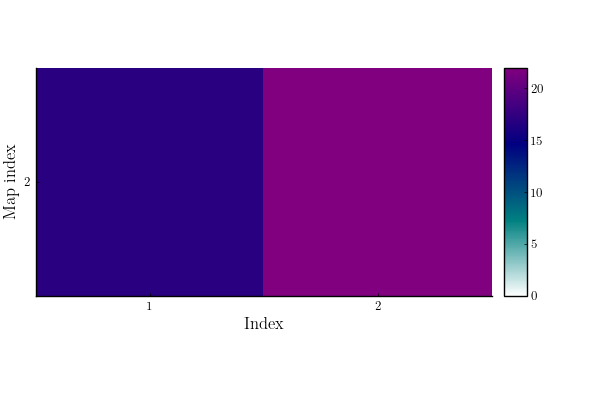

In [75]:
plot(S; start = 2)

Or, display the entire map components

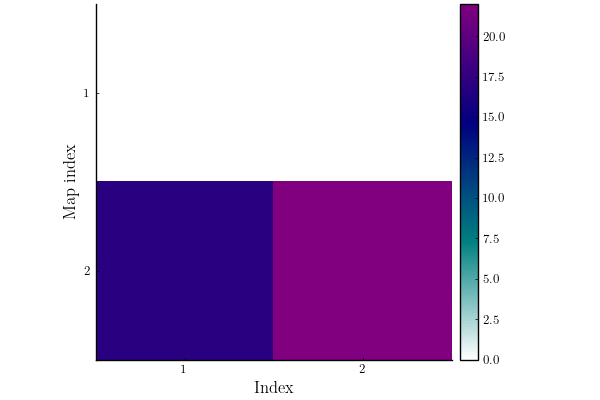

In [74]:
plot(S)

Let's evaluate $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ for the different joint samples with the function `evaluate`. We can solely evaluate the $N_y+1:Ny+N_x$ components of the map, with the argument `start`.

In [85]:
F = evaluate(S, X; start = 2)

2×1000 Array{Float64,2}:
  0.0       0.0       0.0       0.0      …   0.0        0.0      0.0
 -0.171305  1.71532  -1.54862  -1.00852     -0.508593  -0.24483  0.242644

Let's generate the posterior samples by partially inverting the map $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$, for $\boldsymbol{y}^\star = 0.75$

In [256]:
ystar = 0.25
Ystar = ystar*ones(1, Ne);

In [257]:
Xa = deepcopy(X)

2×1000 Array{Float64,2}:
  0.0291366  -0.0584884   0.168476  …   0.586345  -0.0107822  0.485817
 -0.0594149   0.258911   -0.508037     -0.713147  -0.0647475  0.57593

In [258]:
inverse!(F, S, Xa, Ystar; apply_rescaling = true, start = 2)

converged(result) = true


2×1000 Array{Float64,2}:
  0.25      0.25       0.25       0.25      …   0.25       0.25      0.25
 -0.242708  0.612634  -0.578637  -0.507394     -0.406757  -0.302452  0.380324

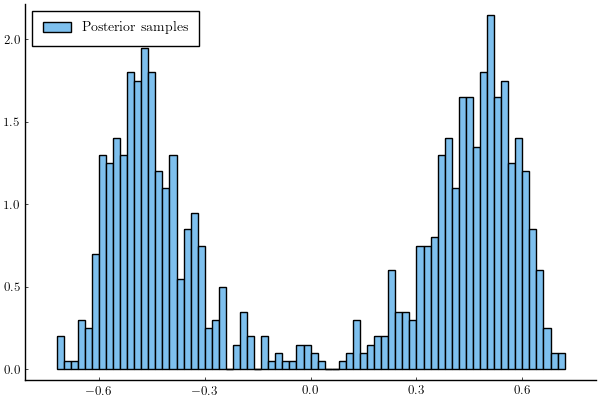

In [259]:
histogram(sort(Xa[2,:]), bins = 90, normalize = :pdf, label = "Posterior samples", color = "skyblue2")

From Bayes theorem: 
\begin{equation}
\pi_{\mathsf{X} | \mathsf{Y}} = \frac{\pi_{\mathsf{Y}| \mathsf{X}} \pi_{\mathsf{X}}}{\pi_{\mathsf{Y}}},  
\end{equation}

with $\pi_{\mathsf{Y}}(\boldsymbol{y}) = \int_{\mathsf{X}} \pi_{\mathsf{Y} | \mathsf{X}}(\boldsymbol{y} | \boldsymbol{x}) \pi_{\mathsf{X}}(\boldsymbol{x})\mathrm{d}\boldsymbol{x}$

We can compute $\pi_{\mathsf{Y}}(\boldsymbol{x})$ by numerical integration using QuadGK.jl

In [287]:
using QuadGK

In [292]:
πy(y) = quadgk(x->pdf(πϵ,y-x^2)*pdf(πx, x), -Inf, Inf)[1]

πy (generic function with 1 method)

In [293]:
# Verify that the integral equates to 1
quadgk(yi->πy(yi), -Inf, Inf)

(0.9993526959160327, 1.4620587829731692e-8)

In [294]:
πpost(y,x) = (pdf(πϵ,y-x^2)*pdf(πx, x))/πy(y)

πpost (generic function with 1 method)

In [264]:
# Verify that the integral equates to 1
quadgk(xi->πpost(ystar, xi), -Inf, Inf)

(1.0000000000000002, 1.1471260286934834e-8)

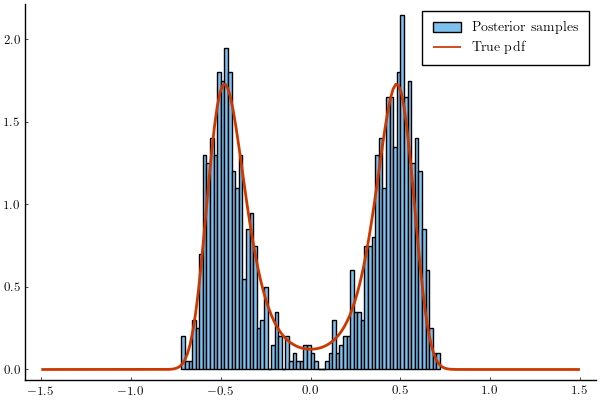

In [265]:
histogram(sort(Xa[2,:]), bins = 90, normalize = :pdf, label = "Posterior samples", color = "skyblue2")
plot!(xrange, map(xi->πpost(ystar, xi), xrange), linewidth = 2, color = "orangered3", label = "True pdf")

We can also compute the approximate posterior density from the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$. Indeed, $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ pushed forward the posterior density $\pi_{\mathsf{X} | \mathsf{Y} = \boldsymbol{y}^\star}$ to the standard normal distribution, or equivalently pulls back the standard normal distribution to the posterior density. The pullback of the reference density by the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ is defined as: 

\begin{equation}
\boldsymbol{S}^{\boldsymbol{\mathcal{X}}, \sharp}(\boldsymbol{\xi}) = \rho \circ \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi}) |\det \nabla \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})|,
\end{equation}

where $\rho$ is the standard Gaussian distribution of $\mathbb{R}^{N_x}$.

In this example, the joint samples are first whitened before to estimate the map $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$. Therefore, we need to rescale the samples `Xplot` before to evaluate the log-pdf of the approximate density.

In [266]:
Xplot = zeros(2, length(xrange))
# Fill the first line of `Xplot` with the realization of the observation variable $\boldsymbol{y}^\star$.
fill!(view(Xplot,1,:), ystar)
# Fill the second line of `Xplot` with the range of x values
Xplot[2,:] .= collect(xrange);
# Rescale the samples
transform!(S.L, Xplot)
# Compute the log-pdf of the pullback, and account for the affine rescaling
logpdfpost_approx = log_pdf(S[2], Xplot) .+ log(1/(S.L.L.diag[2]));
itransform!(S.L, Xplot)
# Lift the samples to the original space.

2×200 Array{Float64,2}:
  0.25   0.25      0.25      0.25     …  0.25     0.25     0.25     0.25
 -1.5   -1.48492  -1.46985  -1.45477     1.45477  1.46985  1.48492  1.5

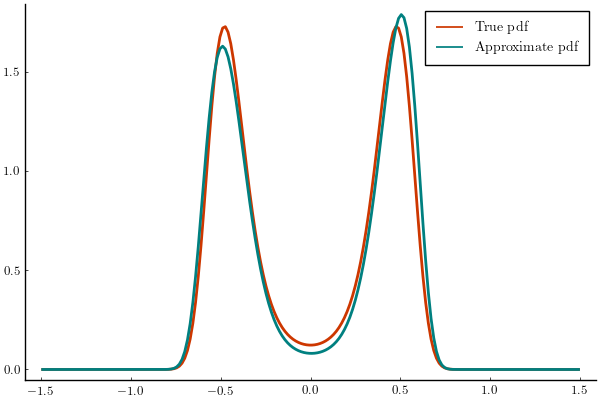

In [267]:
plot(xrange, map(xi->πpost(ystar, xi), xrange), linewidth = 2, color = "orangered3", label = "True pdf")
plot!(xrange, exp.(logpdfpost_approx), linewidth = 2, color = "teal", label = "Approximate pdf")

We can go further and compare the components of the true KR map with the estimated one.

In [268]:
# Rescale the samples
SpushX = evaluate(S, Xplot)

2×200 Array{Float64,2}:
   0.0133166    0.0133166    0.0133166  …   0.0133166   0.0133166   0.0133166
 -10.8292     -10.8264     -10.824         11.8469     11.8469     11.847

In [285]:
Sexact = (ystar .- xrange.^2)/0.1

200-element Array{Float64,1}:
 -20.0
 -19.550011363349412
 -19.10456806646297
 -18.663670109340668
 -18.22731749198252
 -17.795510214388525
 -17.36824827655867
 -16.94553167849297
 -16.527360420191407
 -16.113734501653997
 -15.704653922880736
 -15.300118683871622
 -14.900128784626654
   ⋮
 -15.300118683871622
 -15.704653922880736
 -16.113734501653997
 -16.527360420191407
 -16.94553167849297
 -17.36824827655867
 -17.795510214388525
 -18.22731749198252
 -18.663670109340668
 -19.10456806646297
 -19.550011363349412
 -20.0

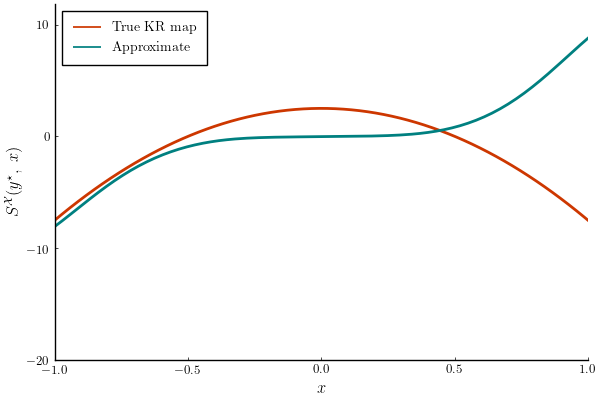

In [286]:
plt = plot(xlabel = L"x", ylabel = L"S^{\mathcal{X}}(y^\star, \; x)", xlim = (-1.0, 1.0), ylim = (-Inf, Inf))

plot!(plt, xrange, Sexact, linewidth = 2, color = "orangered3", label = "True KR map")
plot!(plt, xrange, SpushX[2,:], linewidth = 2, color = "teal", label = "Approximate")